In [64]:
import folium
import requests, json
import pandas as pd
from urllib.parse import quote

In [65]:
with open('keys/도로명주소apiKey.txt') as file:
    road_key = file.read()

In [66]:
base_url = 'https://www.juso.go.kr/addrlink/addrLinkApi.do'
params1 = f'confmKey={road_key}&currentPage=1&countPerPage=10'
params2 = f'keyword={quote("영등포역")}&resultType=json'
url = f'{base_url}?{params1}&{params2}'

In [67]:
result = requests.get(url)
result.status_code

200

In [68]:
res = json.loads(result.text)

In [69]:
places = '영등포제1스포츠센터, 디큐브시티, 성락주유소, 한림대학교강남성심병원, 신도림역, 도림로269'.split(', ')
places

['영등포제1스포츠센터', '디큐브시티', '성락주유소', '한림대학교강남성심병원', '신도림역', '도림로269']

In [70]:
road_addr_list = []
for place in places:
    params2 = f'keyword={quote(place)}&resultType=json'
    url = f'{base_url}?{params1}&{params2}'
    result = requests.get(url)      #Open API 호출하여 결과받기
    if result.status_code == 200:
        res = json.loads(result.text)   #JASON 타입변환
        road_addr_list.append(res['results']['juso'][0]['roadAddr'])    #원하는결과를 append함
    else:
        print(result.status_code)

In [71]:
df = pd.DataFrame({
    '이름': places, '주소': road_addr_list
})
df

,이름,주소
0,영등포제1스포츠센터,서울특별시 영등포구 신풍로 1 (신길동)
1,디큐브시티,"서울특별시 구로구 경인로 662 (신도림동, 디큐브시티)"
2,성락주유소,서울특별시 영등포구 가마산로 414 (신길동)
3,한림대학교강남성심병원,서울특별시 영등포구 시흥대로 665 (대림동)
4,신도림역,서울특별시 구로구 경인로 625 (신도림동)
5,도림로269,서울특별시 영등포구 도림로 269 (신길동)


In [72]:
df.to_csv('data/자주가는장소.csv', index=False)  #index=False로 해야 unnamed가 안생김
pd.read_csv('data/자주가는장소.csv')

,이름,주소
0,영등포제1스포츠센터,서울특별시 영등포구 신풍로 1 (신길동)
1,디큐브시티,"서울특별시 구로구 경인로 662 (신도림동, 디큐브시티)"
2,성락주유소,서울특별시 영등포구 가마산로 414 (신길동)
3,한림대학교강남성심병원,서울특별시 영등포구 시흥대로 665 (대림동)
4,신도림역,서울특별시 구로구 경인로 625 (신도림동)
5,도림로269,서울특별시 영등포구 도림로 269 (신길동)


In [73]:
with open('keys/카카오apiKey.txt') as file:
    kakao_key = file.read()

In [74]:
base_url = 'https://dapi.kakao.com/v2/local/search/address.json'
addr = '서울특별시 영등포구 경인로 지하843 (영등포동3가)'
url = f'{base_url}?query={quote(addr)}'

In [75]:
header = {'Authorization': f'KakaoAK {kakao_key}'}

In [76]:
result = requests.get(url, headers=header).json()
result

{'documents': [{'address': {'address_name': '서울 영등포구 영등포동3가 33',
    'b_code': '1156010400',
    'h_code': '1156053500',
    'main_address_no': '33',
    'mountain_yn': 'N',
    'region_1depth_name': '서울',
    'region_2depth_name': '영등포구',
    'region_3depth_h_name': '영등포동',
    'region_3depth_name': '영등포동3가',
    'sub_address_no': '',
    'x': '126.906658750671',
    'y': '37.5164625580995'},
   'address_name': '서울 영등포구 경인로 지하 843',
   'address_type': 'ROAD_ADDR',
   'road_address': {'address_name': '서울 영등포구 경인로 지하 843',
    'building_name': '영등포역지하도상가',
    'main_building_no': '843',
    'region_1depth_name': '서울',
    'region_2depth_name': '영등포구',
    'region_3depth_name': '영등포동3가',
    'road_name': '경인로',
    'sub_building_no': '',
    'underground_yn': 'Y',
    'x': '126.906658750671',
    'y': '37.5164625580995',
    'zone_no': '07305'},
   'x': '126.906658750671',
   'y': '37.5164625580995'}],
 'meta': {'is_end': True, 'pageable_count': 1, 'total_count': 1}}

In [77]:
result['documents'][0].keys()

dict_keys(['address', 'address_name', 'address_type', 'road_address', 'x', 'y'])

In [78]:
lat = float(result['documents'][0]['y'])
lng = float(result['documents'][0]['x'])
lat, lng

(37.5164625580995, 126.906658750671)

In [91]:
df = pd.read_csv('data/자주가는장소.csv')
df

,이름,주소
0,영등포제1스포츠센터,서울특별시 영등포구 신풍로 1 (신길동)
1,디큐브시티,"서울특별시 구로구 경인로 662 (신도림동, 디큐브시티)"
2,성락주유소,서울특별시 영등포구 가마산로 414 (신길동)
3,한림대학교강남성심병원,서울특별시 영등포구 시흥대로 665 (대림동)
4,신도림역,서울특별시 구로구 경인로 625 (신도림동)
5,우리집,서울특별시 영등포구 도림로 269 (신길동)


In [92]:
lat_list, lng_list = [], []
for i in df.index:
    url = f'{base_url}?query={quote(df["주소"][i])}'
    result = requests.get(url, headers=header).json()
    lat_list.append(float(result['documents'][0]['y']))
    lng_list.append(float(result['documents'][0]['x']))

In [93]:
df['위도'] = lat_list
df['경도'] = lng_list
df

,이름,주소,위도,경도
0,영등포제1스포츠센터,서울특별시 영등포구 신풍로 1 (신길동),37.500542,126.906305
1,디큐브시티,"서울특별시 구로구 경인로 662 (신도림동, 디큐브시티)",37.508123,126.888213
2,성락주유소,서울특별시 영등포구 가마산로 414 (신길동),37.503733,126.902813
3,한림대학교강남성심병원,서울특별시 영등포구 시흥대로 665 (대림동),37.491437,126.907487
4,신도림역,서울특별시 구로구 경인로 625 (신도림동),37.507084,126.884719
5,우리집,서울특별시 영등포구 도림로 269 (신길동),37.501849,126.904182


In [94]:
df.to_csv('data/자주가는장소2.csv', index=False)
pd.read_csv('data/자주가는장소2.csv')

,이름,주소,위도,경도
0,영등포제1스포츠센터,서울특별시 영등포구 신풍로 1 (신길동),37.500542,126.906305
1,디큐브시티,"서울특별시 구로구 경인로 662 (신도림동, 디큐브시티)",37.508123,126.888213
2,성락주유소,서울특별시 영등포구 가마산로 414 (신길동),37.503733,126.902813
3,한림대학교강남성심병원,서울특별시 영등포구 시흥대로 665 (대림동),37.491437,126.907487
4,신도림역,서울특별시 구로구 경인로 625 (신도림동),37.507084,126.884719
5,우리집,서울특별시 영등포구 도림로 269 (신길동),37.501849,126.904182


In [95]:
df['image'] = ['data/수영장.png', 'data/백화점.jpg', 'data/주유소.png', 'data/병원.png', 'data/지하철.png', 'data/집.jpg']
df

,이름,주소,위도,경도,image
0,영등포제1스포츠센터,서울특별시 영등포구 신풍로 1 (신길동),37.500542,126.906305,data/수영장.png
1,디큐브시티,"서울특별시 구로구 경인로 662 (신도림동, 디큐브시티)",37.508123,126.888213,data/백화점.jpg
2,성락주유소,서울특별시 영등포구 가마산로 414 (신길동),37.503733,126.902813,data/주유소.png
3,한림대학교강남성심병원,서울특별시 영등포구 시흥대로 665 (대림동),37.491437,126.907487,data/병원.png
4,신도림역,서울특별시 구로구 경인로 625 (신도림동),37.507084,126.884719,data/지하철.png
5,우리집,서울특별시 영등포구 도림로 269 (신길동),37.501849,126.904182,data/집.jpg



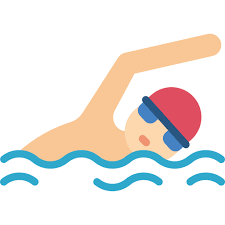
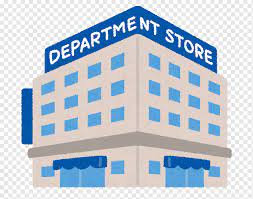
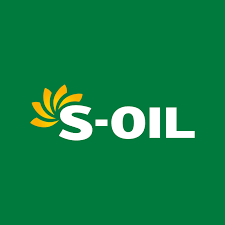
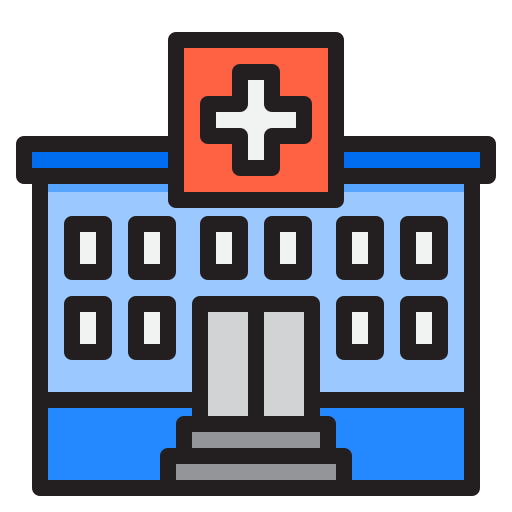
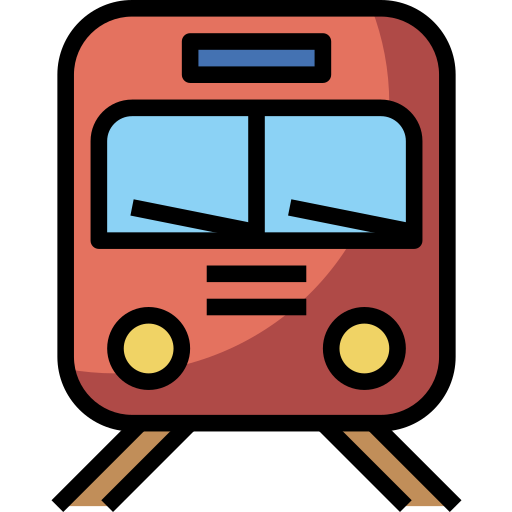
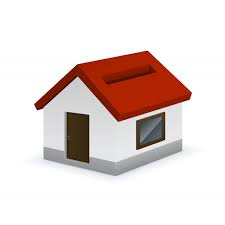

In [144]:
map = folium.Map(location=[df.위도.mean(), df.경도.mean()], zoom_start=14)  #Center position
for i in df.index:
    folium.Marker(
        location=[df.위도[i], df.경도[i]],
        icon=folium.CustomIcon(df.image[i], icon_size=(30,30)),
        tooltip=df.이름[i],
        popup=folium.Popup(df.주소[i], max_width=200)   
    ).add_to(map)
    folium.Marker(
        location=[df.위도[i],df.경도[i]],   
        icon = folium.DivIcon(icon_size=(150,30), icon_anchor=(-15,8), #icon_size=: 글자길이를 조정가능/icon_anchor : 글자위치조정(x,y)
                              html=f'<span style="font-size: 8pt; background-color:white;">{df.이름[i]}</span>')
    ).add_to(map)


title_html = '<h3 align="center" sytle="font-size:20px">자주가는 장소</h3>'
map.get_root().html.add_child(folium.Element(title_html))
map 